# Simulating varying head at x=0 using a sequence of sudden changes of head at $x=0$ and $t=0$

IHE, Delft, 20120-01-06

@T.N.Olsthoorn

## Context

The aquifer is considered of constant transmissivity $kD$ and storage coefficient $S$ and to extend from $0 \le x \le \infty$.

The partial differential equation is

$$ kD \frac {\partial^2 s} {\partial x} = S \frac {\partial s} {\partial t}  $$

The solution for a sudden change of head equal to $A [m]$ at $x=0$ and $t = 0$ is

$$ s(x, t) = A \,\mathtt{erfc}(u), \,\,\,\, u=\sqrt{\frac {x^2 S} {4 kD t}} $$

where $\mathtt {erfc} () $ is the so-called complementary error function:

$$ \mathtt {erfc} (z) = \frac 2 {\sqrt {\pi} } \intop _z ^\infty e ^{-y^2}dy $$

And so its derivative is

$$ \frac {d \mathtt{erfc}(z)} {d z} = - \frac 2 {\sqrt {\pi}} e ^{-z^2} $$

Therefore, the discharge equals

$$ Q = -kD \frac {\partial s} {\partial x} = A \sqrt{\frac {kDS} {\pi t}} \mathtt{exp} \left( -u^2 \right) $$

and for $ x = 0 $

$$ Q_0 = A \sqrt{\frac {kD S} {\pi t}}$$

## Superposition

Any varying head can be approximated using a series of constant heads over short time intervals. This allows to use de 1D solution for a sudden head change to simulate the effect on an aquifer of a varying river head. It is assumed that the aquifer is in direct good contact with the surface water at $x=0$.

The superpostion may be written as

$$ s(x, t) = \sum _{i=1} ^{N} \left\{ A_i \mathtt{erfc} 
\sqrt{\frac {x^2 S} {4 kD (t - t_i)}} \right\}, \,\,\, t \ge t_i $$

Clearly, $a$ term $i$ is non-existent when $t < t_i$.

This formula can be computed by looping over the amplituces and times pertaining to each moment on which the amplitude changes.

With a series of amplitudues A, what matters is the change of amplitude. So we need

$$ A = A_0, A_1 - A_0, A_2 - A_1, ... A_n - A_{n-1} $$

## Loading modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

## Convenience function to set up a graph

In [3]:
def newfig(title='?', xlabel='?', ylabel='?', xlim=None, ylim=None,
                   xscale='linear', yscale='linear', size_inches=(14, 8)):
    '''Setup a new axis for plotting'''
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    ax.grid(True)
    return ax

## Implementation

A  =    1.5    0.5    1.0   -1.2    0.5   -1.8    0.3   -3.0    1.0    0.5   -0.3  [m]
dA =    1.5   -1.0    0.5   -2.2    1.7   -2.3    2.1   -3.3    4.0   -0.5   -0.8  [m]
tc =    0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   10.0  [d]


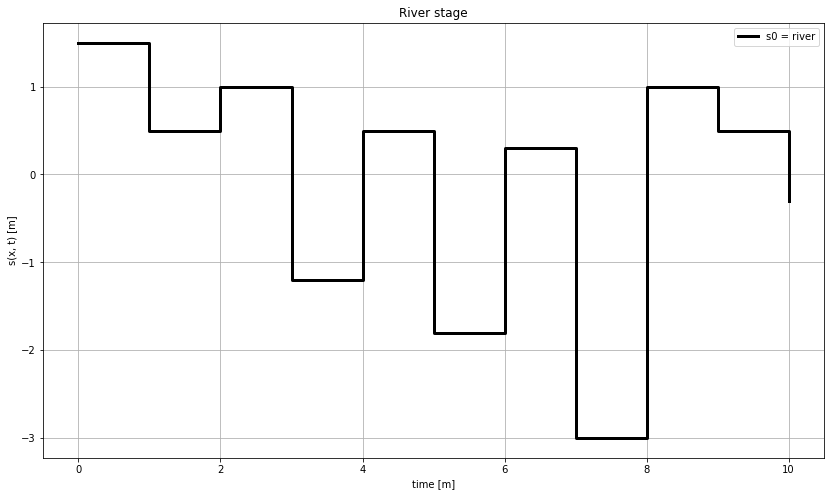

In [27]:
# aquifer properties
kD = 900 # m2/d
S = 0.1 # [-]

# A  is the water level at x=0 at the change times tc
A    = np.array([1.5, 0.5, 1.0, -1.2, 0.5, -1.8, 0.3, -3, 1, 0.5, -0.3]) # m
tc   = np.arange(len(A)) # switch times
dA   = np.diff(np.hstack((0, A))) # m, the head changes at x=0 at the change times

# show the switch times s0 and A
ax = newfig('River stage', 'time [m]', 's(x, t) [m]')

# this is an advanced way of neatly printed a line of formatted numbers
# making sure that the numbers in both lines are exactly above each other
# you could also just print(s0) and print(A)
print('A  = ' + ' '.join([f'{a:6.1f}' for a in A]) + '  [m]')
print('dA = ' + ' '.join([f'{dai:6.1f}' for dai in dA]) + '  [m]')
print('tc = ' + ' '.join([f'{tci:6.1f}' for tci in tc]) + '  [d]')
    

# plot the amplitudes and their changes
ax.step(tc, A, 'k', label="s0 = river", lw=3, where='post')
#ax.step(tc, A, label='dA = change', where='post')
ax.legend()


# Simulation by superposition in time

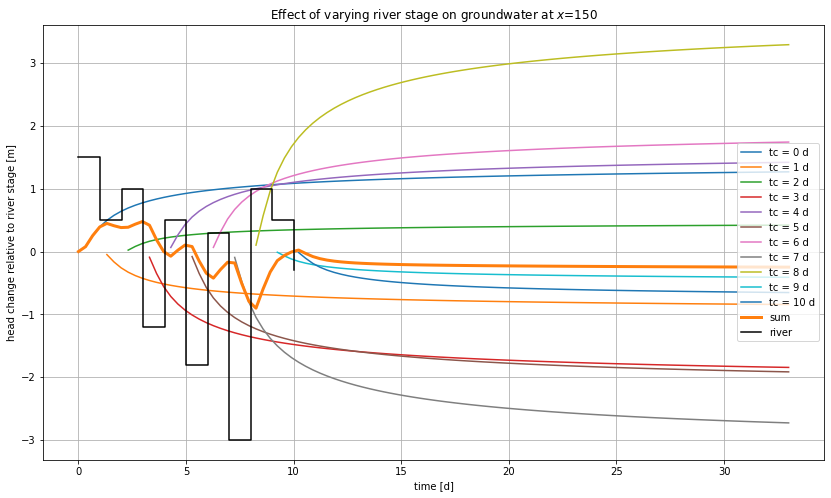

In [17]:
t = np.linspace(0, 3 * len(tc), 101) # simulatioin times in days
x = 150. # choose a value for x for which the graphs will be made

# plot heads
ax = newfig(f"Effect of varying river stage on groundwater at $x$={x:.0f}", 'time [d]',
            'head change relative to river stage [m]')

s = np.zeros_like(t)
for tci, dAi in zip(tc, dA):
    u = np.sqrt((x**2 * S)/(4 * kD * (t[t > tci] - tci)))        
    ds = dAi * erfc(u)  # logical indexing
    ax.plot(t[t > tci], ds, label=f'tc = {tci:.0f} d')
    s[t > tci] += ds
ax.plot(t, s, label='sum', lw=3) 
ax.step(tc, A, 'k', label='river', where='post')
ax.legend(loc='right')


## The discharge at $x=0$

The implementation of the discharge at $x=0$ is straightforward given the mathematical expression derived above.

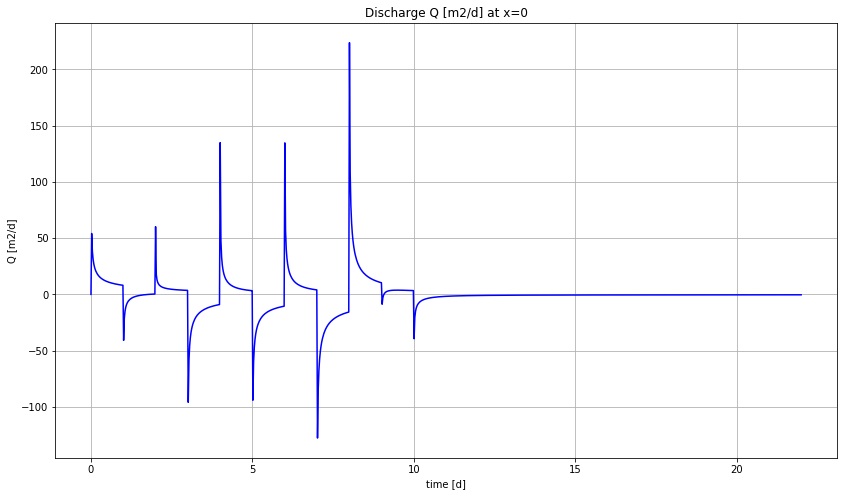

In [26]:
t = np.linspace(0, 2 * len(tc), 1001.) # more points for more detail
ax = newfig('Discharge Q [m2/d] at x=0', 'time [d]','Q [m2/d]')

Q0 = np.zeros_like(t) # initialize the discharge as zeroes

for tci, dAi in zip(tc, dA):
    Q0[t > tci] += dAi * np.sqrt(kD * S / (np.pi * (t[t > tci] - tci)) )

ax.plot(t, Q0, 'b', label='Q0')
